In [ ]:
import os, sys, re
from tqdm import tqdm
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

current_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(current_dir)

In [ ]:
database_path = os.path.join(project_root, "databases", "sber_posts_2023.db")
conn = sqlite3.connect(database_path)
sber_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts_sber", conn)

database_path = os.path.join(project_root, "databases", "sgzh_posts_2023.db")
conn = sqlite3.connect(database_path)
sgzh_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts", conn)

database_path = os.path.join(project_root, "databases", "mtlr_posts_2023.db")
conn = sqlite3.connect(database_path)
mtlr_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts", conn)

database_path = os.path.join(project_root, "databases", "lkoh_posts_2023.db")
conn = sqlite3.connect(database_path)
lkoh_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts", conn)

---

In [6]:
sber_posts_2023["date"] = pd.to_datetime(sber_posts_2023["inserted"].str[:10])
daily_counts_sber = sber_posts_2023.groupby("date").size().reset_index(name="count")

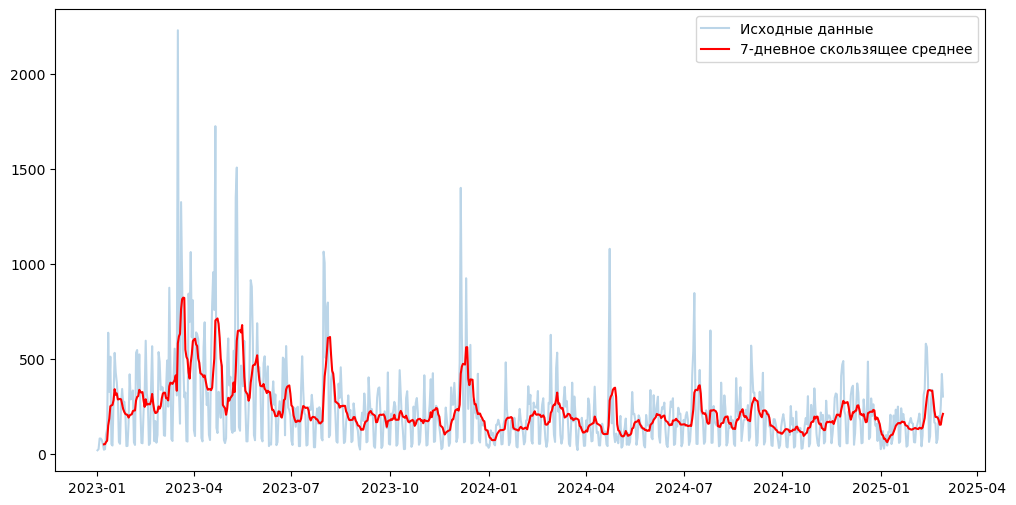

In [9]:
dates = daily_counts_sber['date']
counts = daily_counts_sber['count']

rolling_mean = counts.rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(dates, counts, alpha=0.3, label='–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(dates, rolling_mean, color='red', label='7-–¥–Ω–µ–≤–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ')
plt.legend()

Text(0.5, 1.0, '–û—Å—Ç–∞—Ç–∫–∏')

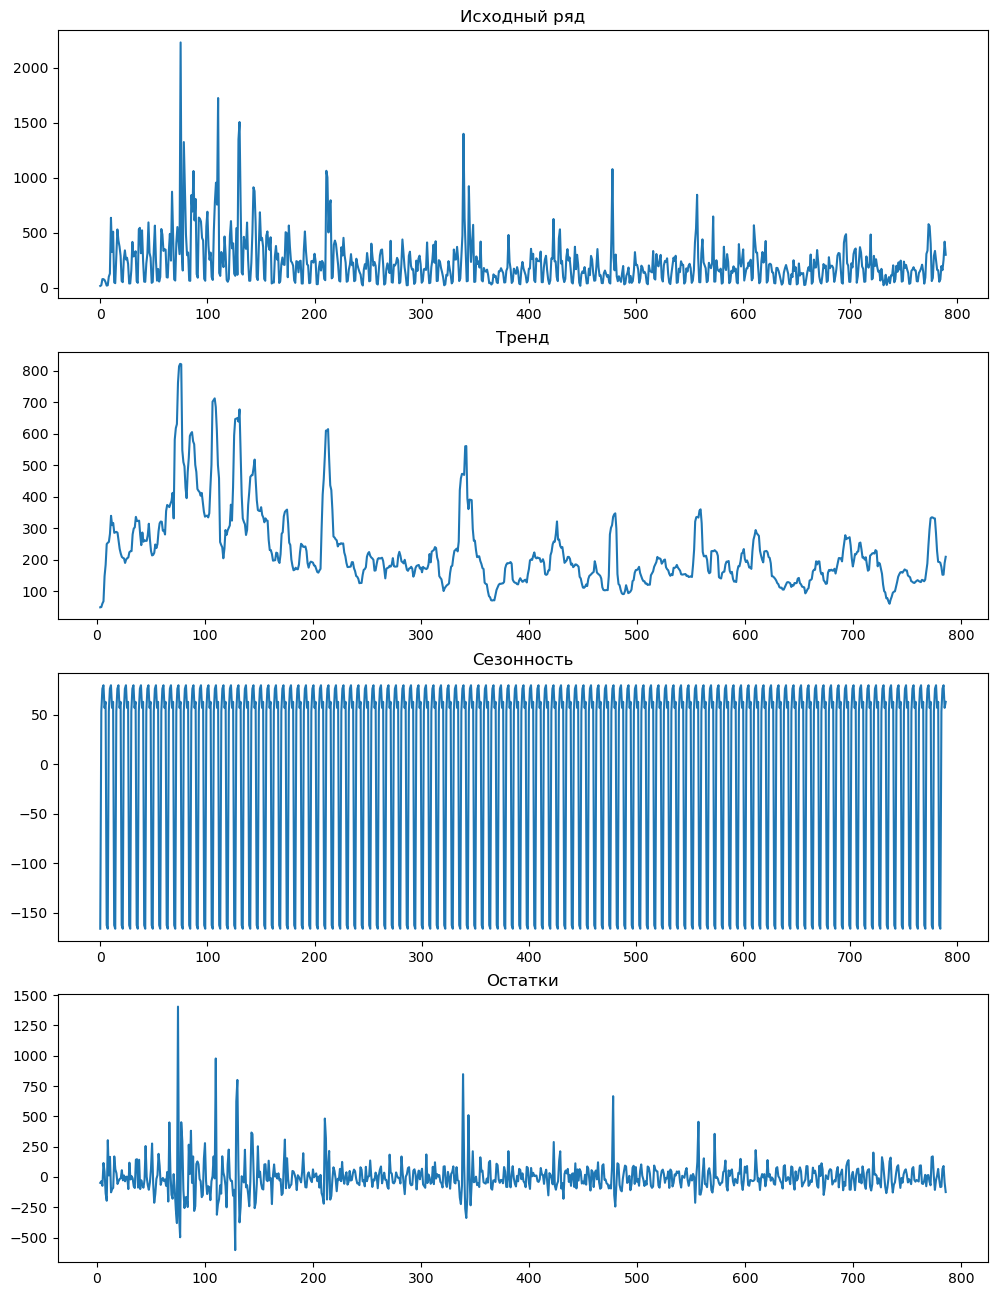

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(counts, period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('–ò—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥')
decomposition.trend.plot(ax=ax2)
ax2.set_title('–¢—Ä–µ–Ω–¥')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
decomposition.resid.plot(ax=ax4)
ax4.set_title('–û—Å—Ç–∞—Ç–∫–∏')

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18972\2277342073.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.80, 1])


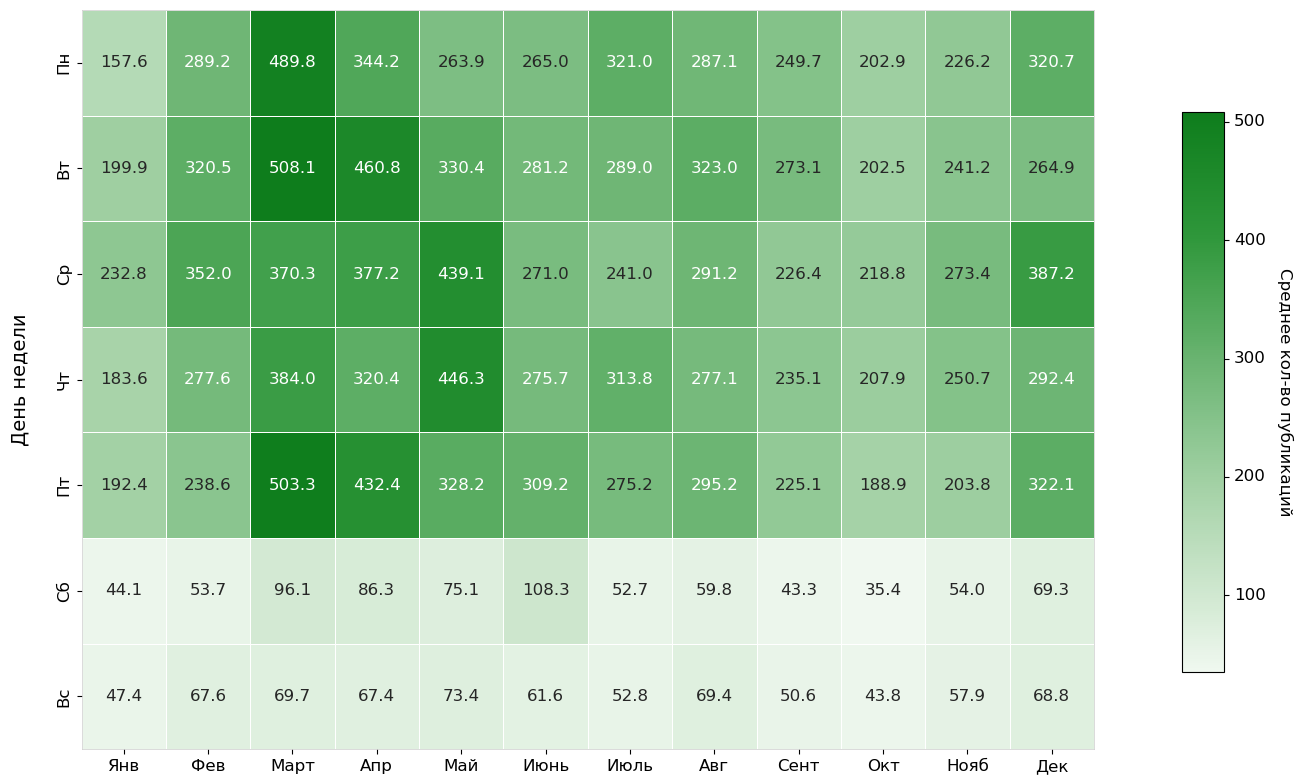

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º–∏ —Ä–∞–∑–º–µ—Ä–∞–º–∏
fig, ax = plt.subplots(figsize=(14, 8))

# –ö–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–µ –∑–µ–ª–µ–Ω—ã–µ —Ü–≤–µ—Ç–∞ –°–±–µ—Ä–±–∞–Ω–∫–∞
# –û—Ç —Å–≤–µ—Ç–ª–æ–≥–æ –∫ —Ç–µ–º–Ω–æ–º—É
sber_colors = [
    "#f0f8f0",  # –û—á–µ–Ω—å —Å–≤–µ—Ç–ª—ã–π –∑–µ–ª–µ–Ω—ã–π
    "#d6ebd6",  # –°–≤–µ—Ç–ª–æ-–∑–µ–ª–µ–Ω—ã–π
    "#bddebe",  # –°–≤–µ—Ç–ª–æ-–∑–µ–ª–µ–Ω—ã–π
    "#a3d1a5",  # –ó–µ–ª–µ–Ω—ã–π —Å—Ä–µ–¥–Ω–µ–π —è—Ä–∫–æ—Å—Ç–∏
    "#87c38c",  # –ó–µ–ª–µ–Ω—ã–π —Å—Ä–µ–¥–Ω–∏–π
    "#6ab471",  # –§–∏—Ä–º–µ–Ω–Ω—ã–π –∑–µ–ª–µ–Ω—ã–π
    "#4da656",  # –ó–µ–ª–µ–Ω—ã–π –Ω–∞—Å—ã—â–µ–Ω–Ω—ã–π
    "#2f973b",  # –¢–µ–º–Ω–æ-–∑–µ–ª–µ–Ω—ã–π
    "#1e8a2b",  # –¢–µ–º–Ω–æ-–∑–µ–ª–µ–Ω—ã–π
    "#0e7d1c",
]  # –ì–ª—É–±–æ–∫–∏–π –∑–µ–ª–µ–Ω—ã–π (–±–ª–∏–∑–∫–æ –∫ –æ—Å–Ω–æ–≤–Ω–æ–º—É –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω–æ–º—É)

# –°–æ–∑–¥–∞–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—É—é —Ü–≤–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É
sber_cmap = LinearSegmentedColormap.from_list("sber_green", sber_colors)

# –†–∏—Å—É–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
h = sns.heatmap(
    heatmap_data,
    cmap=sber_cmap,  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–∞–ª–∏—Ç—Ä—É
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar=False,
    ax=ax,
)

# –í—ã–¥–µ–ª—è–µ–º –±–æ–ª—å—à–µ –º–µ—Å—Ç–∞ —Å–ø—Ä–∞–≤–∞
plt.subplots_adjust(right=0.80)

# –°–æ–∑–¥–∞–µ–º –æ—Ç–¥–µ–ª—å–Ω—ã–µ –æ—Å–∏ –¥–ª—è —Ü–≤–µ—Ç–æ–≤–æ–π —à–∫–∞–ª—ã
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])

# –î–æ–±–∞–≤–ª—è–µ–º —Ü–≤–µ—Ç–æ–≤—É—é —à–∫–∞–ª—É –Ω–∞ —Å–æ–∑–¥–∞–Ω–Ω—ã–µ –æ—Å–∏
cbar = fig.colorbar(h.collections[0], cax=cbar_ax)
cbar.set_label("–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π", rotation=270, labelpad=20)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ –∏ –º–µ—Ç–æ–∫
# plt.title('–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø—É–±–ª–∏–∫–∞—Ü–∏–π –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏ –∏ –º–µ—Å—è—Ü–∞–º', fontsize=16, pad=20)
plt.xlabel("–ú–µ—Å—è—Ü", fontsize=14, labelpad=10)
ax.set_ylabel("–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏", fontsize=14, labelpad=20)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –º–µ—Ç–æ–∫ –æ—Å–µ–π
plt.xticks(rotation=0, ha="center")
plt.yticks(rotation=0, va="center")

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Ä–∞–º–∫–∏
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_color("#cccccc")

# –ü—Ä–∏–º–µ–Ω—è–µ–º tight_layout —Ç–æ–ª—å–∫–æ –∫ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏ –≥—Ä–∞—Ñ–∏–∫–∞
plt.tight_layout(rect=[0, 0, 0.80, 1])

plt.show()

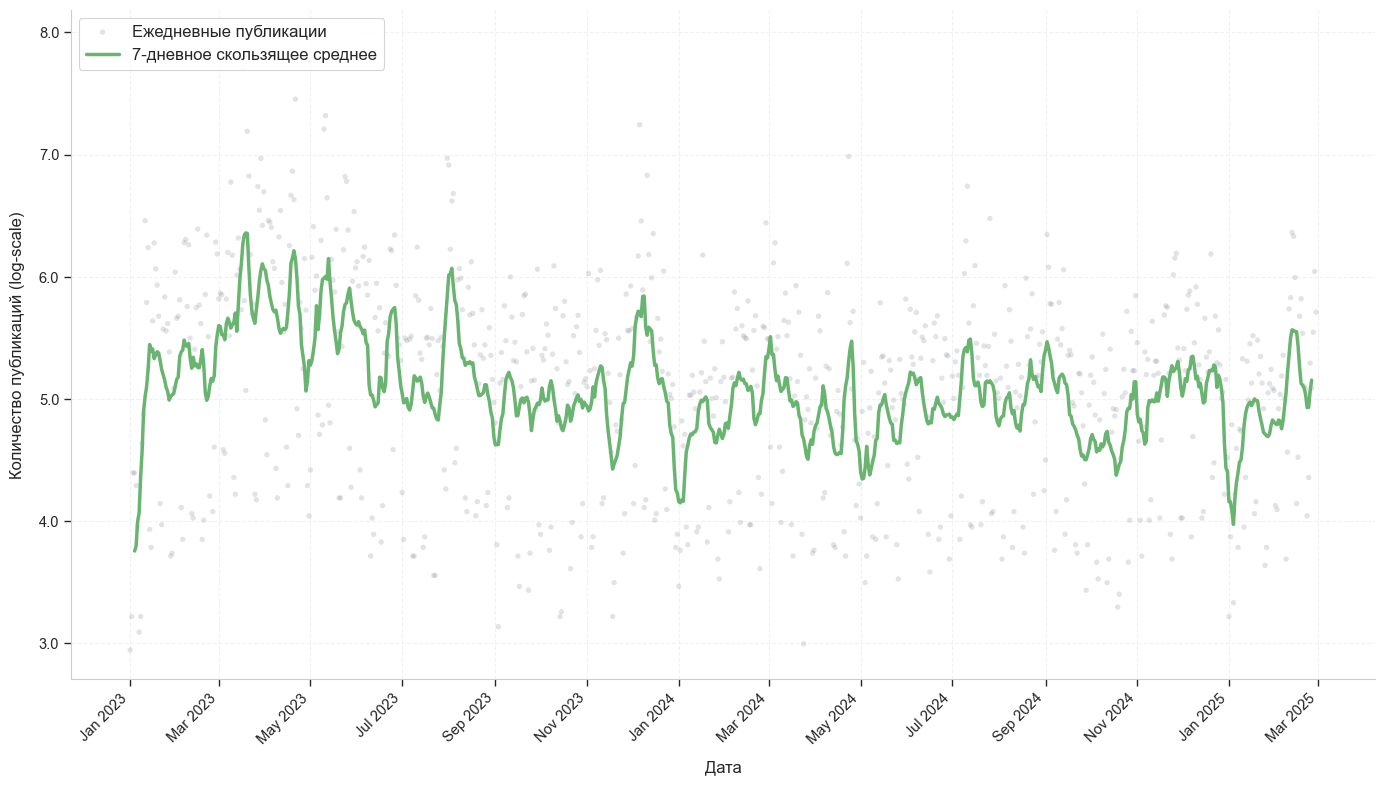

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Å—Ç–∏–ª—å –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.2)

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π DataFrame —Å –¥–∞–Ω–Ω—ã–º–∏ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è df
# –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç —Å—Ç–æ–ª–±—Ü—ã index (–¥–∞—Ç—ã) –∏ 'counts' (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π)

# –ö–æ–ø–∏—Ä—É–µ–º –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
df_log = df.copy()

# –ü—Ä–∏–º–µ–Ω—è–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫ –¥–∞–Ω–Ω—ã–º
df_log['count_log'] = np.log1p(df_log['count'])

# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å —Ä–∞–∑–Ω—ã–º–∏ –æ–∫–Ω–∞–º–∏
df_log['rolling_7d'] = df_log['count_log'].rolling(window=7, center=True).mean()
df_log['rolling_30d'] = df_log['count_log'].rolling(window=30, center=True).mean()

# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
fig, ax = plt.subplots(figsize=(14, 8))

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–µ —Ü–≤–µ—Ç–∞ –°–±–µ—Ä–±–∞–Ω–∫–∞
sber_green = "#1e8a2b"  # –û—Å–Ω–æ–≤–Ω–æ–π –∑–µ–ª–µ–Ω—ã–π
sber_light_green = "#6ab471"  # –°–≤–µ—Ç–ª–æ-–∑–µ–ª–µ–Ω—ã–π
gray_color = "#6c757d"  # –°–µ—Ä—ã–π –¥–ª—è —Ç–æ—á–µ–∫
grid_color = "#e9ecef"  # –¶–≤–µ—Ç —Å–µ—Ç–∫–∏

# –†–∏—Å—É–µ–º —Ç–æ—á–∫–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–ø–æ–ª—É–ø—Ä–æ–∑—Ä–∞—á–Ω—ã–µ)
scatter = ax.scatter(df_log.index, df_log['count_log'], 
                    alpha=0.2, s=15, color=gray_color, 
                    edgecolor='none', label='–ï–∂–µ–¥–Ω–µ–≤–Ω—ã–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏')

# –õ–∏–Ω–∏–∏ —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ä–µ–¥–Ω–∏—Ö
line1 = ax.plot(df_log.index, df_log['rolling_7d'], 
               linewidth=2.5, color=sber_light_green, 
               label='7-–¥–Ω–µ–≤–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ')

# line2 = ax.plot(df_log.index, df_log['rolling_30d'], 
#                linewidth=3.5, color=sber_green, 
#                label='30-–¥–Ω–µ–≤–Ω–æ–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ')

# –§—É–Ω–∫—Ü–∏—è —Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –æ—Å–∏ Y
def y_fmt(y, pos):
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    # return f'{int(np.expm1(y)):,}'.replace(',', ' ')
    return y

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ—Å–µ–π –∏ —Å–µ—Ç–∫–∏
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # –ü–æ–¥–ø–∏—Å—å –∫–∞–∂–¥—ã–µ 2 –º–µ—Å—è—Ü–∞
ax.grid(True, linestyle='--', alpha=0.7, color=grid_color)

# –ê–≤—Ç–æ—Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞—Ç –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –Ω–∞–ª–æ–∂–µ–Ω–∏—è
fig.autofmt_xdate(rotation=45)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ –∏ –ø–æ–¥–ø–∏—Å–µ–π
# ax.set_title('–î–∏–Ω–∞–º–∏–∫–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–π –≤ T-pulse: –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —à–∫–∞–ª–∞', 
#            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('–î–∞—Ç–∞', fontsize=12, labelpad=10)
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π (log-scale)', fontsize=12, labelpad=10)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ª–µ–≥–µ–Ω–¥—ã
legend = ax.legend(loc='upper left', frameon=True, fontsize=12, 
                  framealpha=0.95, edgecolor='lightgrey')
legend.get_frame().set_linewidth(0.8)

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ—è—Å–Ω–µ–Ω–∏–µ –æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ
# footnote = ax.annotate('–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ –¥–ª—è –ª—É—á—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ç—Ä–µ–Ω–¥–æ–≤',
#                      xy=(0.5, -0.12), xycoords='axes fraction', ha='center',
#                      fontsize=11, fontstyle='italic', color='#555555')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–±–æ–ª—å—à–∏–µ –æ—Ç—Å—Ç—É–ø—ã –≤–æ–∫—Ä—É–≥ –¥–∞–Ω–Ω—ã—Ö
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –æ—Å–∏ Y
y_min = df_log['count_log'].min()
y_max = df_log['count_log'].max()
y_range = y_max - y_min
ax.set_ylim([y_min - 0.05 * y_range, y_max + 0.1 * y_range])

# –§–∏–Ω–∞–ª—å–Ω—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ
plt.tight_layout()
plt.savefig('sber_publications_log_scale.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
top_dates = df.sort_values(by='count', ascending=False).head(5)
top_dates

count  month  day_of_week
date                                 
2023-03-17   2230      3            4
2023-04-21   1725      4            4
2023-05-11   1507      5            3
2023-12-06   1400     12            2
2023-05-10   1350      5            2

In [49]:
sber_posts_2023[sber_posts_2023['date'] == '2023-03-17']['content'].head(200).values

array(['{$SBER}üöÄ',
       '–î—Ä—É–∑—å—è, –¥–∞–≤–∞–π—Ç–µ –Ω–µ–º–Ω–æ–≥–æ –ø–æ–≥–æ–≤–æ—Ä–∏–º –æ —à–æ—Ä—Ç–∞—Ö. –í–∏–∂—É –º–Ω–æ–≥–æ –¥–∏—Å–∫—É—Å—Å–∏–π –ø–æ —ç—Ç–æ–º—É –ø–æ–≤–æ–¥—É –≤ –ø—É–ª—å—Å–µ.\n\n–û–ø–∏—à—É, –∫–∞–∫ –¥–µ–ª–∞—Ç—å –Ω–µ –Ω–∞–¥–æ –¥–ª—è –Ω–∞—á–∞–ª–∞:\nüî¥–∏–¥—Ç–∏ –ø—Ä–æ—Ç–∏–≤ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞(—ç—Ç–æ –ø—Ä–∞–≤–∏–ª–æ –Ω–æ–º–µ—Ä 1)\nüî¥–∑–∞—Ö–æ–¥–∏—Ç—å –±–µ–∑ —Å—Ç–æ–ø–æ–≤ –ø–µ—Ä–µ–¥ –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å—é(–∞ –≤–¥—Ä—É–≥ –æ–Ω–∞ –ª—É—á—à–µ/—Ö—É–∂–µ –≤–∞—à–∏—Ö –∏ –æ–±—â–∏—Ö –æ–∂–∏–¥–∞–Ω–∏–π)\nüî¥–∏–¥—Ç–∏ –ø—Ä–æ—Ç–∏–≤ –∫–æ–º–ø–∞–Ω–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –µ—Å—Ç—å –≤ –∏–Ω–¥–µ–∫—Å–µ, –∫–æ–≥–¥–∞ –∏–Ω–¥–µ–∫—Å —Ä–∞—Å—Ç–µ—Ç(–∏–Ω–¥–µ–∫—Å –≤—ã—Ç—è–Ω–µ—Ç –∞–∫—Ü–∏—é)\nüî¥—Å—Ç–∞–≤–∏—Ç—å –∫–æ—Ä–æ—Ç–∫–∏–µ —Å—Ç–æ–ø—ã –Ω–∞ –æ—Ç–∫—Ä—ã—Ç–∏–∏ —Ä—ã–Ω–∫–∞(—á–∞—Å—Ç–æ –Ω–∞ –æ—Ç–∫—Ä—ã—Ç–∏–∏ —Å–æ–±–∏—Ä–∞—é—Ç –ª–∏–∫–≤–∏–¥–Ω–æ—Å—Ç—å, –ø–æ—Ç–æ–º —Ü–µ–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∫ –∏—Å—Ö–æ–¥–Ω—ã–º, –∏ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –æ–±—ã—á–Ω–∞—è —Ç–æ—Ä–≥–æ–≤–ª—è, –ø–æ—ç—Ç–æ–º—É, –µ—Å–ª–∏ –Ω–∞–±–ª

In [51]:
# %pip install wordcloud pymystem3

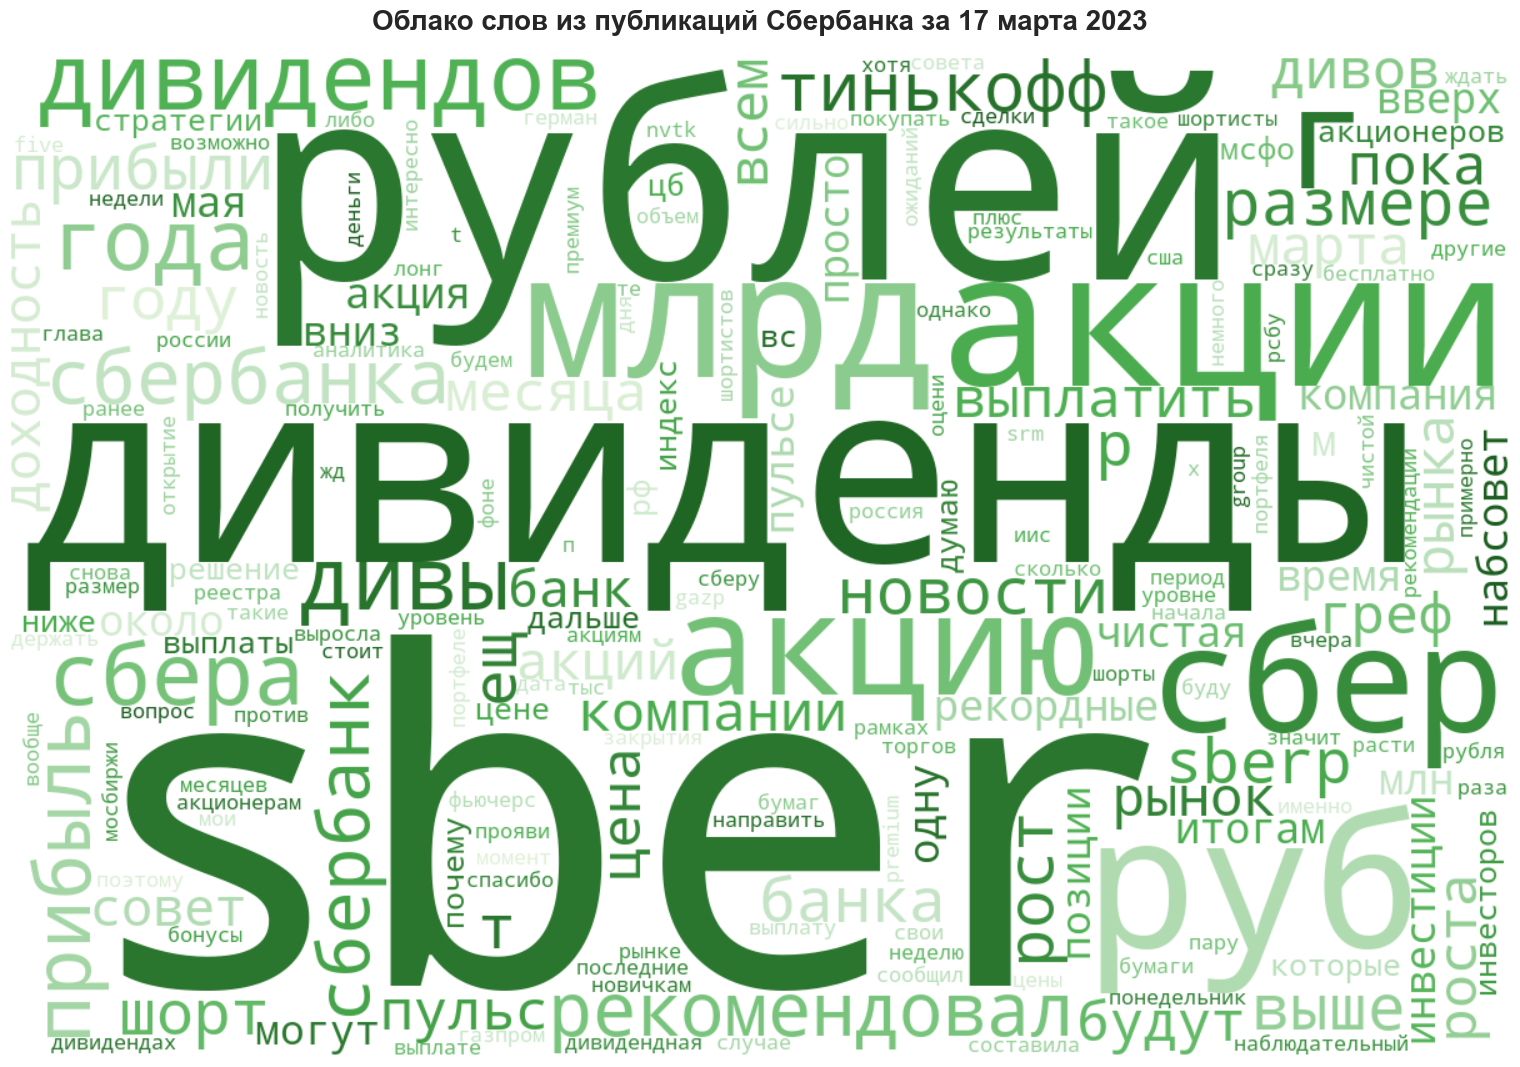

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
from matplotlib.colors import LinearSegmentedColormap

# –ü–æ–ª—É—á–∞–µ–º —Ç–µ–∫—Å—Ç—ã –ø—É–±–ª–∏–∫–∞—Ü–∏–π
texts = sber_posts_2023[sber_posts_2023['date'] == '2023-03-17']['content'].values

# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –≤ –æ–¥–∏–Ω –¥–æ–∫—É–º–µ–Ω—Ç
text = ' '.join(texts)

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
def preprocess_text(text):
    # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()
    
    # –£–¥–∞–ª—è–µ–º URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # –£–¥–∞–ª—è–µ–º HTML-—Ç–µ–≥–∏
    text = re.sub(r'<.*?>', '', text)
    
    # –£–¥–∞–ª—è–µ–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã –∏ —Ü–∏—Ñ—Ä—ã
    text = re.sub(r'[^–∞-—è–ê-–Øa-zA-Z\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    
    # –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –ø—Ä–æ–±–µ–ª—ã
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# –ü—Ä–∏–º–µ–Ω—è–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É
cleaned_text = preprocess_text(text)

# –î–æ–±–∞–≤–ª—è–µ–º —Ä—É—Å—Å–∫–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞
try:
    russian_stopwords = set(stopwords.words('russian'))
except:
    russian_stopwords = set()

# –†—É—á–Ω–æ–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤
custom_stopwords = {'—ç—Ç–æ', '–∫–æ—Ç–æ—Ä—ã–π', '–≤–µ—Å—å', '–Ω–∞—à', '—Å–≤–æ–π', '—Ç–∞–∫–æ–π', '–æ—á–µ–Ω—å', '—Ç–∞–∫–∂–µ',
                   '–∫–æ—Ç–æ—Ä—ã–π', '–º–æ—á—å', '–Ω—É–∂–Ω–æ', '–µ—â—ë', '—Å–∞–º—ã–π', '–º–æ–∂–Ω–æ', '–≥–æ–¥', '–±–æ–ª–µ–µ',
                   '–Ω–æ–≤—ã–π', '–Ω–∞–ø—Ä–∏–º–µ—Ä', '—Ç–æ–ª—å–∫–æ', '–±—ã—Ç—å', '–¥—Ä—É–≥–æ–π', '–∫–∞–∂–¥—ã–π', '—Å–µ–≥–æ–¥–Ω—è', 
                   '–≤–∞—à', '–¥–µ–Ω—å', '–Ω–µ—Ç', '–≤—Å—ë', '–¥–ª—è', '–∫–æ–≥–¥–∞', '—á—Ç–æ', '–∫–∞–∫', '–µ—Å–ª–∏', '–≤–∞–º', 
                   '—Ç–∞–∫', '–µ–≥–æ', '—ç—Ç–æ—Ç', '–æ–Ω–∏', '–æ–Ω–∞', '–æ–Ω–æ', '–∏—Ö', '–≤–∞—Å', '—Ç–∞–º', '—Ç—É—Ç',
                   '–º—ã', '–≤—ã', '–æ–Ω', '–æ—Ç', '–ø–æ', '–∫', '—É', '–Ω–∞–¥', '–Ω–∞', '–∑–∞', '–∏–∑', '–ø–æ–¥', '—Å', '–≤'}

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –∏ –∫–∞—Å—Ç–æ–º–Ω—ã–µ
all_stopwords = russian_stopwords.union(custom_stopwords)

# –°–æ–∑–¥–∞–µ–º —Å–≤–æ—é —Ü–≤–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É, –≥–¥–µ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ —Å–ª–æ–≤–∞ –±—É–¥—É—Ç –Ω–∞—Å—ã—â–µ–Ω–Ω–æ–≥–æ –∑–µ–ª–µ–Ω–æ–≥–æ —Ü–≤–µ—Ç–∞
# –û—Ç —Å–≤–µ—Ç–ª–æ-–∑–µ–ª–µ–Ω–æ–≥–æ –∫ —è—Ä–∫–æ-–∑–µ–ª–µ–Ω–æ–º—É
sber_colors = ["#dff0d8",  # –û—á–µ–Ω—å —Å–≤–µ—Ç–ª—ã–π –∑–µ–ª–µ–Ω—ã–π
              "#c8e6c9",  # –°–≤–µ—Ç–ª—ã–π –∑–µ–ª–µ–Ω—ã–π
              "#a5d6a7",  # –ó–µ–ª–µ–Ω—ã–π
              "#81c784",  # –°—Ä–µ–¥–Ω–∏–π –∑–µ–ª–µ–Ω—ã–π
              "#66bb6a",  # –í—ã—Ä–∞–∑–∏—Ç–µ–ª—å–Ω—ã–π –∑–µ–ª–µ–Ω—ã–π
              "#4caf50",  # –ù–∞—Å—ã—â–µ–Ω–Ω—ã–π –∑–µ–ª–µ–Ω—ã–π
              "#43a047",  # –ù–∞—Å—ã—â–µ–Ω–Ω—ã–π —Ç–µ–º–Ω—ã–π –∑–µ–ª–µ–Ω—ã–π
              "#388e3c",  # –¢–µ–º–Ω–æ-–∑–µ–ª–µ–Ω—ã–π
              "#2e7d32",  # –ì–ª—É–±–æ–∫–∏–π –∑–µ–ª–µ–Ω—ã–π
              "#1b5e20"]  # –û—á–µ–Ω—å —Ç–µ–º–Ω—ã–π –∑–µ–ª–µ–Ω—ã–π

# –°–æ–∑–¥–∞–µ–º –∫–∞—Å—Ç–æ–º–Ω—É—é —Ü–≤–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É
sber_cmap = LinearSegmentedColormap.from_list("sber_greens", colors=sber_colors[::-1])  # –ò–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –ø–æ—Ä—è–¥–æ–∫

# –°–æ–∑–¥–∞–µ–º word cloud —Å –Ω–æ–≤–æ–π —Ü–≤–µ—Ç–æ–≤–æ–π –∫–∞—Ä—Ç–æ–π
wordcloud = WordCloud(
    width=1200, 
    height=800,
    background_color='white',
    stopwords=all_stopwords,
    max_words=200,
    colormap=sber_cmap,  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –Ω–∞—à—É –∫–∞—Å—Ç–æ–º–Ω—É—é –∫–∞—Ä—Ç—É
    collocations=False,  
    contour_width=1,
    contour_color='#1e8a2b',
    random_state=42,
    prefer_horizontal=0.9
).generate(cleaned_text)

# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É –±–æ–ª—å—à–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.title('–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –∏–∑ –ø—É–±–ª–∏–∫–∞—Ü–∏–π –°–±–µ—Ä–±–∞–Ω–∫–∞ –∑–∞ 17 –º–∞—Ä—Ç–∞ 2023', 
         fontsize=20, fontweight='bold', pad=20)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏
plt.savefig('sber_wordcloud_20230317.png', dpi=300, bbox_inches='tight')
plt.show()